## Class 1
Revising basics of pandas and seaborn  


### How reliable is your data?

Much has been made of a link between brain size and intelligence. We will test this by correalating head circumference with the marks in the warm-up quiz

### Method. 
Each group of 5 should have a tape measure.  
Two people should each measure the heads of everyone in the group and everyone in the group beside you.  
Wrap the tape measure around just above the ears.  
Everyone will get measured 4 times.  Be fast!

### Data Entry. 
Make a python dataframe for your data from lists of Measurer, Group, Group-member, Head_diameter

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


Enter your data into python lists.   Just replace the numbers and names here with your own. Here Charlie and Thu are the measurers from one group and Pakkapol and Xiao-feng from the other

In [12]:
Group_member = ['Aaron', 'Alice', 'Charlie', 'Thibauld', 'Thu', 'Pakkapol', 'Saima', 'Hillary', 'Faye', 'Xiao-feng']
Charlie_tape = [56,58,51,55,52,50,54,53,58,57,]
Thu_tape = [55,58,50,55,53,50,52,53,60,57,]
Pakkapol_tape = [55,59,52,58,51,53,55,55,57,56]
Xiaofeng_tape = [56,58,52,57,51,52,55,54,57,55]

Combine lists into a dataframe

In [13]:
zipped = list(zip(Group_member, Charlie_tape, Thu_tape, Pakkapol_tape, Xiaofeng_tape ))
df = pd.DataFrame(zipped, columns=['Head_measured', 'Charlie_tape', 'Thu_tape','Pakkapol_tape', 'Xiao-feng_tape'])

We now have a pandas dataframe.  It has an index running along the left hand, column names on the top.  There are useful functions for checking and summarising it.

#### Check things look right

In [14]:
df.shape

(10, 5)

In [15]:
df.head(3)

,Head_measured,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
0,Aaron,56,55,55,56
1,Alice,58,58,59,58
2,Charlie,51,50,52,52


Summarising

In [16]:
df.describe()

,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape
count,10.000000,10.000,10.000000,10.000000
mean,54.400000,54.300,55.100000,54.700000
std,2.875181,3.335,2.558211,2.406011
min,50.000000,50.000,51.000000,51.000000
25%,52.250000,52.250,53.500000,52.500000
50%,54.500000,54.000,55.000000,55.000000
75%,56.750000,56.500,56.750000,56.750000
max,58.000000,60.000,59.000000,58.000000


You can get just single statistics for each column.  This gives you the mean or max of the columns - for example, the biggest head Thu measured.

In [ ]:
df.mean()

In [ ]:
df.max()

Each column in the dataframe is a series.  This is a bit like a python list, but has an order, index and, like dataframes, there are functions to describe and summarise them.  A series can be called in different ways.  It can be assigned to a variable:

In [18]:
P = df['Thu_tape']

In [ ]:
max(P)

In [22]:
P.max()

57

Or called directly within a function, either explictly:

In [23]:
max(df['Thu_tape'])

57

Or simply (if the column. name has no spaces, or odd characters)

In [24]:
max(df.Thu)

57

Other functions you can use to summarise a series:  
    
    P.min()
    P.mean()
    P.median()
    P.std()
    P.skew()
    P.quantile(0.5)
    P.nlargest(3)
    P.sample(2)
    P.head(3
    P.value_counts()
    
    

### Do we have reliable measures?

Plot the measures against each other.  Does every measurer get the same result for each head?  Are some measurers measuring large, some small?

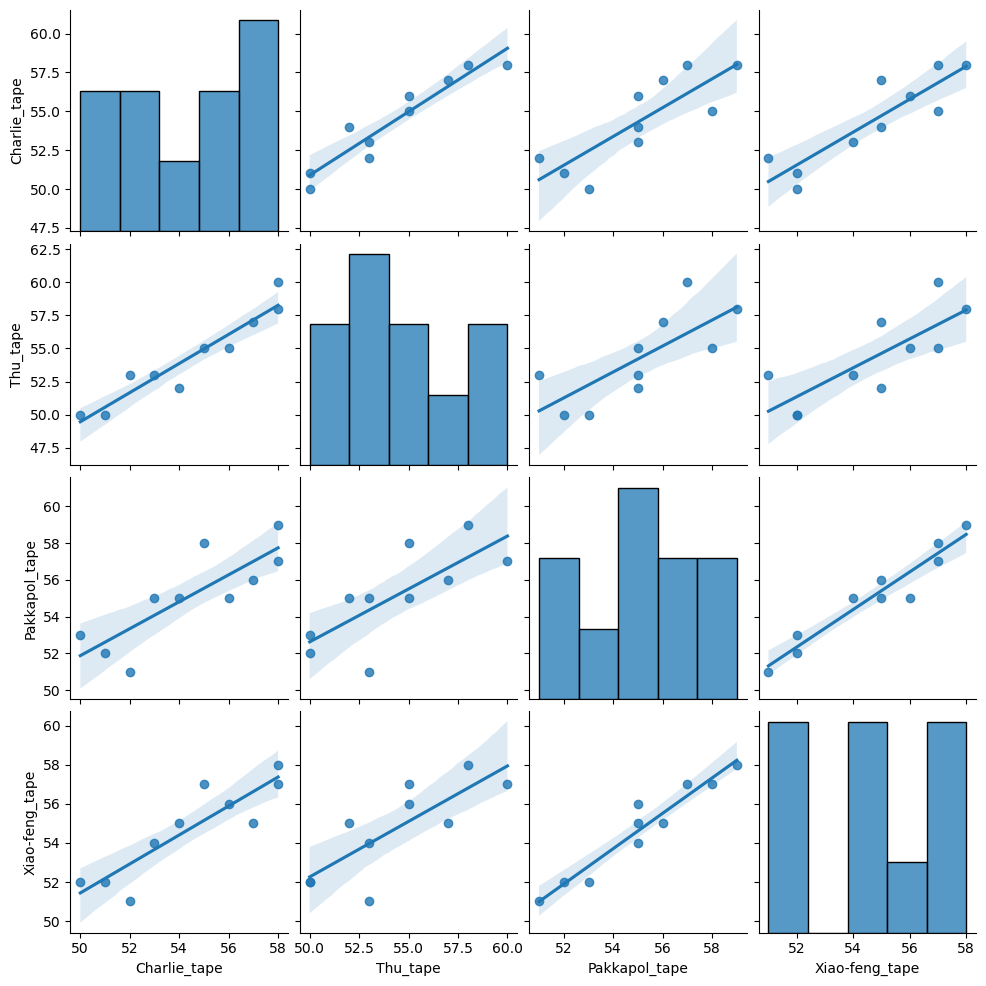

In [24]:
sns.pairplot(df, kind="reg")

In [ ]:
To go along with the quiz data we need to get the average of all the measurements for each head.  Here's one way

In [26]:
df['Av_diameter'] = df[['Charlie_tape','Thu_tape', 'Pakkapol_tape', 'Xiao-feng_tape']].mean(axis=1)

In [28]:
df

,Head_measured,Charlie_tape,Thu_tape,Pakkapol_tape,Xiao-feng_tape,Av_diameter
0,Aaron,56,55,55,56,55.50
1,Alice,58,58,59,58,58.25
2,Charlie,51,50,52,52,51.25
3,Thibauld,55,55,58,57,56.25
4,Thu,52,53,51,51,51.75
5,Pakkapol,50,50,53,52,51.25
6,Saima,54,52,55,55,54.00
7,Hillary,53,53,55,54,53.75
8,Faye,58,60,57,57,58.00
9,Xiao-feng,57,57,56,55,56.25


The averages will be gathered by denomstrators, along with quiz marks.  These are anonymous!

Whilst we are waiting for all the class data to be gathered in have a play with different plots you can do with seaborn

In [ ]:
https://seaborn.pydata.org/examples/

### Whole-class data gathering

Demonstrators will enter all the data into a sharepoint document which can be read in using this code (once it is complete!).  

Data is:
Student_Group, Student_number, Head_Size_cm, Quiz_Score

In [20]:
#download shared group data
 
import requests
import pandas as pd
 
file_url = 'https://uoe-my.sharepoint.com/:x:/g/personal/ckidner_ed_ac_uk/EWOdw-R6PTFOhgM8RkdP1dkB61N7-Z-gaOuRXFdPSK9fpw?download=1'
image_name = 'DexB2_class_data.xlsx'
r = requests.get(file_url, stream=True)
with open(image_name, 'wb') as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [21]:
df=pd.read_excel('DexB2_class_data.xlsx')

In [22]:
df

,Student_Group,Student_Number,Head_Size_cm,Quiz_Score
0,gr1,1,56,7
1,gr1,2,54,3
2,gr1,3,57,6
3,gr1,4,52,2
4,gr1,5,51,9


Are head circumferences normally distributed?

In [ ]:
sns.histplot(data = df, x='Head_Size_cm')

Use the Shaprio-Wilkes test to check for normality

In [ ]:
# test for normality
stat, p = shapiro(df['Head_Size_cm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

### Now for the intelligence part!  
Plot a histogram and check the normality of the quiz marks

Is there a correlation between head size and abiltiy to recall data analysis skills from last year?  
Plot one against the other using:  

    sns.regplot(data=df, x="Head_Size_cm", y="Quiz_mark")